---
## It's a ***Book Recommendation System Project***.
---
#### we'll use *Collaborative Filtering Based Approch* here...
---
---

In [54]:
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
books_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Books Recommendation System/dataset/Books.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Books Recommendation System/dataset/Ratings.csv")
users_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Books Recommendation System/dataset/Users.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [56]:
books_df["Book-Title"] = books_df["Book-Title"].apply(lambda x : x.lower())

In [57]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [58]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [59]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [60]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [61]:
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [62]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [63]:
books_df.duplicated().sum(), rating_df.duplicated().sum(), users_df.duplicated().sum()

(0, 0, 0)

---
### although Users Age has lots of Null values. Hence, our Engine will not use Age here..

In [64]:
books_df.duplicated().sum(), rating_df.duplicated().sum(), users_df.duplicated().sum()

(0, 0, 0)

---
#### here Book Rating is 0 to 10 rank
---

In [65]:
rating_df["Book-Rating"].min(), rating_df["Book-Rating"].max()

(0, 10)

---
### Combined DataFrame including User-ID and Rating...
---
---

In [66]:
rating_book_df = pd.merge(rating_df, books_df.drop(["Image-URL-S", "Image-URL-M"], axis=1), on="ISBN")

In [67]:
rating_book_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,276725,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


---
#### Popular Books selecting which are voted at least over 300 times for top ***50 Trending Books*** result..
---
---

In [68]:
num_rating_df = rating_book_df.groupby("Book-Title").count()["Book-Rating"].reset_index().rename(columns={"Book-Rating": "num_rating"})
num_rating_df = num_rating_df.loc[(num_rating_df["num_rating"] >= 300)]                        ## filtering those books which are voted at least over 300 times
num_rating_df

,Book-Title,num_rating
815,1st to die: a novel,509
1036,2nd chance,356
1923,a bend in the road,346
4236,a heartbreaking work of staggering genius,302
5100,a map of the world,327
...,...,...
230554,while i was gone,431
230904,white oleander : a novel,387
230905,white oleander : a novel (oprah's book club),356
231816,wicked: the life and times of the wicked witch...,326


In [69]:
avg_rating_df = rating_book_df.groupby("Book-Title").mean()["Book-Rating"].reset_index().rename(columns={"Book-Rating": "avg_rating"})
avg_rating_df["avg_rating"] = avg_rating_df["avg_rating"].apply(lambda x : round(x, 2))                                                   ## limiting Average Rating points
avg_rating_df.head()

,Book-Title,avg_rating
0,a light in the storm: the civil war diary of ...,2.25
1,always have popsicles,0.00
2,apple magic (the collector's series),0.00
3,"ask lily (young women of faith: lily series, ...",8.00
4,beyond ibm: leadership marketing and finance ...,0.00


In [70]:
popular_df = num_rating_df.merge(avg_rating_df, on="Book-Title")
popular_df = popular_df.merge(rating_book_df.drop_duplicates("Book-Title")[["Book-Title", "Image-URL-L", "Book-Author"]], on="Book-Title")

popular_df = popular_df.sort_values("avg_rating", ascending=False)

popular_df.head(30)

## Popular Books for Trending System

,Book-Title,num_rating,avg_rating,Image-URL-L,Book-Author
35,harry potter and the prisoner of azkaban (book 3),428,5.85,http://images.amazon.com/images/P/0439136369.0...,J. K. Rowling
33,harry potter and the goblet of fire (book 4),387,5.82,http://images.amazon.com/images/P/0439139600.0...,J. K. Rowling
34,harry potter and the order of the phoenix (boo...,347,5.50,http://images.amazon.com/images/P/043935806X.0...,J. K. Rowling
32,harry potter and the chamber of secrets (book 2),556,5.18,http://images.amazon.com/images/P/0439064864.0...,J. K. Rowling
78,the fellowship of the ring (the lord of the ri...,368,4.95,http://images.amazon.com/images/P/0618129030.0...,J. R. R. Tolkien
36,harry potter and the sorcerer's stone (harry p...,575,4.90,http://images.amazon.com/images/P/059035342X.0...,J. K. Rowling
111,to kill a mockingbird,510,4.70,http://images.amazon.com/images/P/0446310786.0...,Harper Lee
76,the da vinci code,898,4.64,http://images.amazon.com/images/P/0385504209.0...,Dan Brown
71,the catcher in the rye,449,4.55,http://images.amazon.com/images/P/0316769487.0...,J.D. Salinger
80,the five people you meet in heaven,430,4.55,http://images.amazon.com/images/P/0786868716.0...,Mitch Albom


---
#### we'll recommend Books based on user given rating on each Books,
##### basically, then similarest Rating holder Book will be recommended for the Selected Book using ***COSINE SIMILARITY*** approch...
---
---
##### hence, ***EUCLIDEAN DISTANCE*** can also be used. but ***COSINE SIMILARITY*** performs better in *Text Analysis and Similarity* finding...
---

In [71]:
rating_book_df.loc[(rating_book_df["User-ID"] == 2)]                ## this User just rated 1 Book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
185192,2,0195153448,0,classical mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...


---
#### now, we'll not consider every Books and every Users..!
---
---
##### and also, we'll select our experienced Readers/ Users who had rated at least 200 different Books.. 
##### instead, *we'll select the Famous Books which are at least rated equal or more than 50 times*.
---


In [72]:
exp_usrs = rating_book_df.groupby("User-ID").count()["Book-Rating"] >= 200

In [73]:
exp_usrs_idx = exp_usrs[exp_usrs].index

In [74]:
exp_usrs_idx

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=816)

In [75]:
rating_book_df[rating_book_df["User-ID"].isin(exp_usrs_idx)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
2,6543,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,flesh tones: a novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,the theology of the hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,the ordeal of integration: progress and resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,pushcart's complete rotten reviews &amp; rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,there's a porcupine in my outhouse: misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...


In [76]:
## filtered Dataframe with Users who rated over at least 200 Books...

filtered_rating_book_df = rating_book_df[rating_book_df["User-ID"].isin(exp_usrs_idx)]              

In [77]:
famous_books = filtered_rating_book_df.groupby("Book-Title").count()["Book-Rating"] >= 50

In [78]:
famous_books_idx = famous_books[famous_books].index

In [79]:
famous_books_idx

Index(['1984', '1st to die: a novel', '2nd chance', '4 blondes',
       '\o\" is for outlaw"', 'a bend in the road', 'a case of need',
       'a child called \it\": one child's courage to survive"',
       'a civil action', 'a cry in the night',
       ...
       'winter solstice', 'wish you well', 'without remorse',
       'wizard and glass (the dark tower, book 4)', 'wld accordng garp',
       'wuthering heights', 'year of wonders', 'you belong to me',
       'zen and the art of motorcycle maintenance: an inquiry into values',
       'zoya'],
      dtype='object', name='Book-Title', length=719)

In [80]:
filtered_rating_book_df[filtered_rating_book_df["Book-Title"].isin(famous_books_idx)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
63,278418,0446520802,0,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,the catcher in the rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,the rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...


In [81]:
## final filtered Dataframe with Users who rated over at least 200 Books and Famous Books who had rated over at least 50 times...

final_filtered = filtered_rating_book_df[filtered_rating_book_df["Book-Title"].isin(famous_books_idx)]

In [82]:
final_filtered.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
63,278418,0446520802,0,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,the notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...


In [83]:
final_filtered.groupby("Book-Title").count()[["Book-Rating"]]

,Book-Rating
Book-Title,
1984,71
1st to die: a novel,160
2nd chance,123
4 blondes,70
"\o\"" is for outlaw""",102
...,...
wuthering heights,76
year of wonders,57
you belong to me,98


In [84]:
a = final_filtered.groupby("Book-Title").count()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


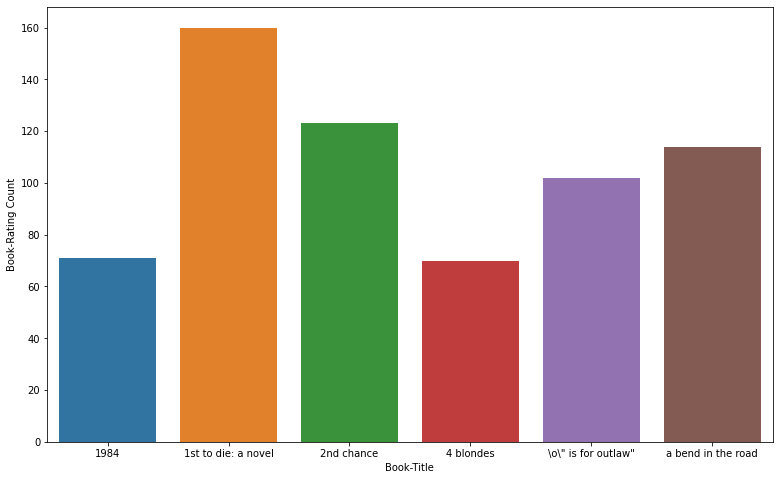

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.barplot(a.index[:6], a["Book-Rating"][:6])
plt.ylabel("Book-Rating Count")
plt.show()

In [86]:
final_filtered.pivot_table(index=["Book-Title"], columns=["User-ID"], values=["Book-Rating"])

Book-Rating                \
User-ID                                                 254    2276   2766     
Book-Title                                                                     
1984                                                       9.0    NaN    NaN   
1st to die: a novel                                        NaN    NaN    NaN   
2nd chance                                                 NaN   10.0    NaN   
4 blondes                                                  NaN    NaN    NaN   
\o\" is for outlaw"                                        NaN    NaN    NaN   
...                                                        ...    ...    ...   
wuthering heights                                          NaN    NaN    NaN   
year of wonders                                            NaN    NaN    NaN   
you belong to me                                           NaN    NaN    NaN   
zen and the art of motorcycle maintenance: an i...         NaN    NaN    NaN   
zoya                                                       NaN    NaN    NaN   

                                                                         \
User-ID                                            2977   3363   4017     
Book-Title                                                                
1984                                                  NaN    NaN    NaN   
1st to die: a novel                                   NaN    NaN    NaN   
2nd chance                                            NaN    NaN    NaN   
4 blondes                                             NaN    NaN    NaN   
\o\" is for outlaw"                                   NaN    NaN    NaN   
...                                                   ...    ...    ...   
wuthering heights                                     NaN    NaN    NaN   
year of wonders                                       7.0    NaN    NaN   
you belong to me                                      NaN    NaN    NaN   
zen and the art of motorcycle maintenance: an i...    NaN    0.0    NaN   
zoya                                                  NaN    NaN    NaN   

                                                                         \
User-ID                                            4385   6251   6323     
Book-Title                                                                
1984                                                  NaN    NaN    NaN   
1st to die: a novel                                   NaN    NaN    NaN   
2nd chance                                            NaN    NaN    NaN   
4 blondes                                             NaN    0.0    NaN   
\o\" is for outlaw"                                   NaN    NaN    NaN   
...                                                   ...    ...    ...   
wuthering heights                                     NaN    NaN    NaN   
year of wonders                                       NaN    NaN    NaN   
you belong to me                                      NaN    NaN    0.0   
zen and the art of motorcycle maintenance: an i...    NaN    0.0    NaN   
zoya                                                  NaN    NaN    NaN   

                                                           ...                \
User-ID                                            6543    ... 271705 273979   
Book-Title                                                 ...                 
1984                                                  NaN  ...   10.0    NaN   
1st to die: a novel                                   9.0  ...    NaN    NaN   
2nd chance                                            0.0  ...    NaN    NaN   
4 blondes                                             NaN  ...    NaN    NaN   
\o\" is for outlaw"                                   NaN  ...    NaN    NaN   
...                                                   ...  ...    ...    ...   
wuthering heights                                     NaN  ...    NaN    NaN   
year of wonders             

In [87]:
train_pivot_table = final_filtered.pivot_table(index=["Book-Title"], columns=["User-ID"], values=["Book-Rating"]).fillna(0)

In [88]:
train_pivot_table

Book-Rating                \
User-ID                                                 254    2276   2766     
Book-Title                                                                     
1984                                                       9.0    0.0    0.0   
1st to die: a novel                                        0.0    0.0    0.0   
2nd chance                                                 0.0   10.0    0.0   
4 blondes                                                  0.0    0.0    0.0   
\o\" is for outlaw"                                        0.0    0.0    0.0   
...                                                        ...    ...    ...   
wuthering heights                                          0.0    0.0    0.0   
year of wonders                                            0.0    0.0    0.0   
you belong to me                                           0.0    0.0    0.0   
zen and the art of motorcycle maintenance: an i...         0.0    0.0    0.0   
zoya                                                       0.0    0.0    0.0   

                                                                         \
User-ID                                            2977   3363   4017     
Book-Title                                                                
1984                                                  0.0    0.0    0.0   
1st to die: a novel                                   0.0    0.0    0.0   
2nd chance                                            0.0    0.0    0.0   
4 blondes                                             0.0    0.0    0.0   
\o\" is for outlaw"                                   0.0    0.0    0.0   
...                                                   ...    ...    ...   
wuthering heights                                     0.0    0.0    0.0   
year of wonders                                       7.0    0.0    0.0   
you belong to me                                      0.0    0.0    0.0   
zen and the art of motorcycle maintenance: an i...    0.0    0.0    0.0   
zoya                                                  0.0    0.0    0.0   

                                                                         \
User-ID                                            4385   6251   6323     
Book-Title                                                                
1984                                                  0.0    0.0    0.0   
1st to die: a novel                                   0.0    0.0    0.0   
2nd chance                                            0.0    0.0    0.0   
4 blondes                                             0.0    0.0    0.0   
\o\" is for outlaw"                                   0.0    0.0    0.0   
...                                                   ...    ...    ...   
wuthering heights                                     0.0    0.0    0.0   
year of wonders                                       0.0    0.0    0.0   
you belong to me                                      0.0    0.0    0.0   
zen and the art of motorcycle maintenance: an i...    0.0    0.0    0.0   
zoya                                                  0.0    0.0    0.0   

                                                           ...                \
User-ID                                            6543    ... 271705 273979   
Book-Title                                                 ...                 
1984                                                  0.0  ...   10.0    0.0   
1st to die: a novel                                   9.0  ...    0.0    0.0   
2nd chance                                            0.0  ...    0.0    0.0   
4 blondes                                             0.0  ...    0.0    0.0   
\o\" is for outlaw"                                   0.0  ...    0.0    0.0   
...                                                   ...  ...    ...    ...   
wuthering heights                                     0.0  ...    0.0    0.0   
year of wonders             

In [89]:
final_filtered["User-ID"].unique().shape, final_filtered["Book-Title"].unique().shape

((815,), (719,))

In [90]:
np.where(train_pivot_table.index == "1984")

(array([0]),)

---
### ***COSINE SIMILARITY***...
---

---
#### *formula:* cos(x, y) = x . y / ||x|| * ||y||
---
---
#### where,

* x . y = product (dot) of the vectors ‘x’ and ‘y’.
* ||x|| and ||y|| = length of the two vectors ‘x’ and ‘y’.
* ||x|| * ||y|| = cross product of the two vectors ‘x’ and ‘y’.



In [91]:
def euclidean_dist(x1, x2):
  dist = np.sqrt(np.sum((x1 - x2) ** 2, axis=1))
  return dist

In [92]:

from sklearn.metrics.pairwise import cosine_similarity


---
### Recommender Engine
---

In [93]:

def recommender_engine(book_name):
  data = []
  
  idx = np.where(train_pivot_table.index == book_name)[0][0]
  most_similar_idx = np.argsort(cosine_similarity(train_pivot_table)[idx])[::-1][1:7]
    
  
  for book in np.array(train_pivot_table.index)[most_similar_idx]:
    desc_book = final_filtered.loc[(final_filtered["Book-Title"] == book)].iloc[0, ]
    book_datas = [desc_book["Image-URL-L"], desc_book["Book-Title"].title(), desc_book["Book-Author"], desc_book["Year-Of-Publication"], desc_book["Publisher"]]
    data.append(book_datas)

  return data


In [94]:
### to make more faster engine:...

similarity_scores = cosine_similarity(train_pivot_table)

In [95]:
similarity_scores

array([[1.        , 0.0999137 , 0.01189468, ..., 0.01592652, 0.11799012,
        0.07158663],
       [0.0999137 , 1.        , 0.2364573 , ..., 0.17837034, 0.07446129,
        0.16773875],
       [0.01189468, 0.2364573 , 1.        , ..., 0.15675217, 0.04558758,
        0.04938579],
       ...,
       [0.01592652, 0.17837034, 0.15675217, ..., 1.        , 0.12563693,
        0.2999273 ],
       [0.11799012, 0.07446129, 0.04558758, ..., 0.12563693, 1.        ,
        0.07085128],
       [0.07158663, 0.16773875, 0.04938579, ..., 0.2999273 , 0.07085128,
        1.        ]])

In [96]:
def recommender_engine(book_name):
  data = []
  
  idx = np.where(train_pivot_table.index == book_name)[0][0]
  most_similar_idx = np.argsort(similarity_scores[idx])[::-1][1:7]
    
  
  for book in np.array(train_pivot_table.index)[most_similar_idx]:
    desc_book = final_filtered.loc[(final_filtered["Book-Title"] == book)].iloc[0, ]
    book_datas = [desc_book["Image-URL-L"], desc_book["Book-Title"].title(), desc_book["Book-Author"], desc_book["Year-Of-Publication"], desc_book["Publisher"]]
    data.append(book_datas)

  return data

In [97]:
# bookname = input("Enter Bookname: ").strip().lower()
bookname = "1984"
print("\n\n[RECOMMENDATIONS]\n")

for book_data in recommender_engine(bookname):
  print(book_data)




[RECOMMENDATIONS]

['http://images.amazon.com/images/P/0451526341.01.LZZZZZZZ.jpg', 'Animal Farm', 'George Orwell', 2004, 'Signet']
['http://images.amazon.com/images/P/0449212602.01.LZZZZZZZ.jpg', "The Handmaid'S Tale", 'Margaret Atwood', 1989, 'Fawcett Books']
['http://images.amazon.com/images/P/0060809833.01.LZZZZZZZ.jpg', 'Brave New World', 'Aldous Huxley', 1989, 'Harpercollins']
['http://images.amazon.com/images/P/0345313860.01.LZZZZZZZ.jpg', 'The Vampire Lestat (Vampire Chronicles, Book Ii)', 'ANNE RICE', 1986, 'Ballantine Books']
['http://images.amazon.com/images/P/0374172897.01.LZZZZZZZ.jpg', 'The Hours : A Novel', 'Michael Cunningham', 1998, 'Farrar, Straus and Giroux']
['http://images.amazon.com/images/P/0345342968.01.LZZZZZZZ.jpg', 'Fahrenheit 451', 'RAY BRADBURY', 1987, 'Del Rey']


---
### Model and DataBase Saving Part:
---
#### we'll save all of the necessary Items for Project:
##### DataFrames/ DataBases:
* popular_df
* final_filtered
* train_pivot_table



```
```
##### Engines/ Models:
* recommender_engine()
* cosine_similarity()
---

In [98]:
from pickle import dump, load

In [99]:
# dump(cosine_similarity, open('cosine_similarity.bin', 'wb'))

dump(popular_df, open('popular_df.bin', 'wb'))
dump(final_filtered, open('final_filtered.bin', 'wb'))
dump(train_pivot_table, open('train_pivot_table.bin', 'wb'))
dump(similarity_scores, open('similarity_scores.bin', 'wb'))

In [100]:

for book_data in recommender_engine('heaven and earth (three sisters island trilogy)'):
  print(book_data)

['http://images.amazon.com/images/P/051512608X.01.LZZZZZZZ.jpg', 'The Reef', 'Nora Roberts', 1999, 'Jove Books']
['http://images.amazon.com/images/P/0515131229.01.LZZZZZZZ.jpg', 'Dance Upon The Air (Three Sisters Island Trilogy)', 'Nora Roberts', 2003, 'Jove Books']
['http://images.amazon.com/images/P/051513287X.01.LZZZZZZZ.jpg', 'Face The Fire (Three Sisters Island Trilogy)', 'Nora Roberts', 2002, 'Jove Books']
['http://images.amazon.com/images/P/0515135062.01.LZZZZZZZ.jpg', 'Three Fates', 'Nora Roberts', 2004, 'Jove Books']
['http://images.amazon.com/images/P/0373483503.01.LZZZZZZZ.jpg', 'Macgregor Brides (Macgregors)', 'Nora Roberts', 1997, 'Silhouette']
['http://images.amazon.com/images/P/0425189031.01.LZZZZZZZ.jpg', 'Portrait In Death', 'Nora Roberts', 2003, 'Berkley Publishing Group']


In [101]:
# recommender_engn('angus, thongs and full-frontal snogging: confessions of georgia nicolson')

In [102]:
b = load(open('popular_df.bin', 'rb'))
b

,Book-Title,num_rating,avg_rating,Image-URL-L,Book-Author
35,harry potter and the prisoner of azkaban (book 3),428,5.85,http://images.amazon.com/images/P/0439136369.0...,J. K. Rowling
33,harry potter and the goblet of fire (book 4),387,5.82,http://images.amazon.com/images/P/0439139600.0...,J. K. Rowling
34,harry potter and the order of the phoenix (boo...,347,5.50,http://images.amazon.com/images/P/043935806X.0...,J. K. Rowling
32,harry potter and the chamber of secrets (book 2),556,5.18,http://images.amazon.com/images/P/0439064864.0...,J. K. Rowling
78,the fellowship of the ring (the lord of the ri...,368,4.95,http://images.amazon.com/images/P/0618129030.0...,J. R. R. Tolkien
...,...,...,...,...,...
118,while i was gone,431,2.58,http://images.amazon.com/images/P/0345443284.0...,Sue Miller
97,the perfect storm : a true story of men agains...,404,2.54,http://images.amazon.com/images/P/0060977477.0...,Sebastian Junger
4,a map of the world,327,2.49,http://images.amazon.com/images/P/0385720106.0...,Jane Hamilton
21,disclosure,318,2.35,http://images.amazon.com/images/P/0345391055.0...,Michael Crichton
